In [ ]:
#Downloading the data into the colab enviroment
!gdown 1nK5BAnPKtvMKawq6eRs5lsMUbY9WpDgj

Downloading...
From: https://drive.google.com/uc?id=1nK5BAnPKtvMKawq6eRs5lsMUbY9WpDgj
To: /content/COMP1801_CourseworkDataset1_tabular.csv
100% 95.8k/95.8k [00:00<00:00, 94.3MB/s]


In [ ]:
# Loading necessary libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn.linear_model, sklearn.datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression ,LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Data Exploration

In [ ]:
df = pd.read_csv("/content/COMP1801_CourseworkDataset1_tabular.csv")

In [ ]:
df

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die
...,...,...,...,...,...,...,...,...,...,...,...
995,462.984817,Blade,equiGrain,24,2.023624,2.741713,20,0,0,Bottom,Continuous
996,1426.298870,Nozzle,equiGrain,21,1.741670,7.206022,12,0,0,Bottom,Investment
997,1538.072772,Blade,colGrain,14,1.658847,8.276388,12,0,0,Top,Investment
998,1893.052813,Nozzle,equiGrain,9,2.124314,5.033330,0,0,0,Bottom,Continuous


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lifespan        1000 non-null   float64
 1   partType        1000 non-null   object 
 2   microstructure  1000 non-null   object 
 3   coolingRate     1000 non-null   int64  
 4   quenchTime      1000 non-null   float64
 5   forgeTime       1000 non-null   float64
 6   smallDefects    1000 non-null   int64  
 7   largeDefects    1000 non-null   int64  
 8   sliverDefects   1000 non-null   int64  
 9   seedLocation    1000 non-null   object 
 10  castType        1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [ ]:
categorical_columns = ['partType','microstructure','seedLocation','castType']
numerical_columns = ['coolingRate','quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']

In [ ]:
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  print(df[col].value_counts())
  print()

Categories and number of occurrences for 'partType'
Nozzle    293
Valve     241
Blade     236
Block     230
Name: partType, dtype: int64

Categories and number of occurrences for 'microstructure'
singleGrain    357
colGrain       328
equiGrain      315
Name: microstructure, dtype: int64

Categories and number of occurrences for 'seedLocation'
Top       507
Bottom    493
Name: seedLocation, dtype: int64

Categories and number of occurrences for 'castType'
Continuous    356
Investment    333
Die           311
Name: castType, dtype: int64



In [ ]:
df.describe()

,Lifespan,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1366.373468,17.480000,2.786059,5.497136,13.37100,0.117000,0.286000
std,519.026551,7.557958,1.320935,2.613501,8.07047,0.565359,1.351307
min,115.120563,5.000000,0.501046,1.017799,0.00000,0.000000,0.000000
25%,960.976320,11.000000,1.608916,3.203739,8.00000,0.000000,0.000000
50%,1470.377014,17.000000,2.824488,5.510765,16.00000,0.000000,0.000000
75%,1757.165684,24.000000,3.902389,7.735951,20.00000,0.000000,0.000000
max,2380.142759,30.000000,4.990795,9.988511,33.00000,4.000000,10.000000


<ipython-input-81-f58c3604dca8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()
<ipython-input-81-f58c3604dca8>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


<Axes: title={'center': 'Correlation matrix of sub-sampled data'}>

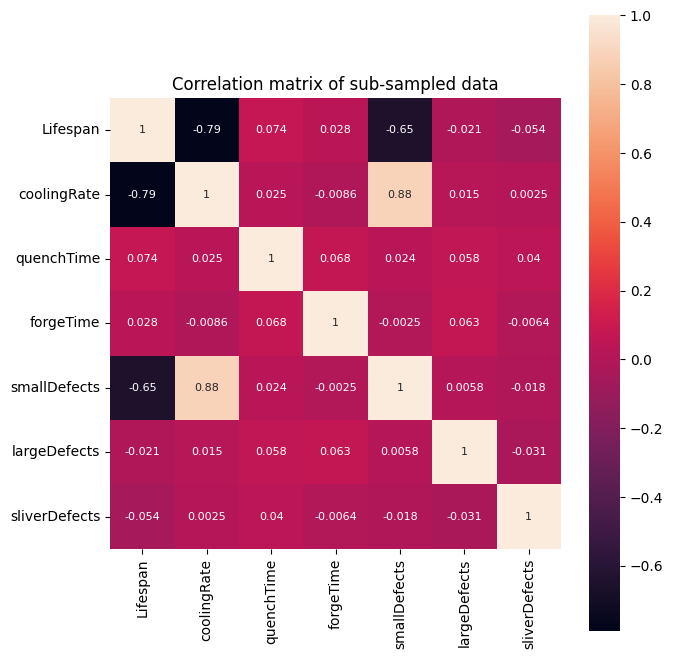

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Correlation matrix of sub-sampled data')
sns.heatmap(corrmat, vmax=1, square=True,annot = True, annot_kws={"size":8})

# Data Pre Processing

In [ ]:
Y = df['Lifespan']
X = df.drop(['Lifespan'],axis = 1)

In [ ]:
x = np.array(X)
y = np.array(Y)

In [ ]:
# Split the data into non-test/test data
X_non_test, X_test, y_non_test, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)

# Split the non-test data into non-test/test data
X_train, X_valid, y_train, y_valid = train_test_split(X_non_test, y_non_test, test_size=0.25, shuffle=True, random_state=0)


In [ ]:
# To test the polynomial feature
X_train_raw = X_train.copy()
X_valid_raw = X_valid.copy()
X_test_raw = X_test.copy()

In [ ]:
X_train

,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
787,Valve,singleGrain,29,2.678911,7.635241,21,0,0,Bottom,Die
683,Valve,singleGrain,27,1.606196,7.227727,19,0,0,Top,Die
616,Valve,equiGrain,21,2.794441,8.748829,19,4,0,Bottom,Continuous
691,Valve,equiGrain,12,1.458396,4.871779,10,0,0,Bottom,Continuous
972,Nozzle,colGrain,26,1.639828,7.702630,33,0,10,Bottom,Investment
...,...,...,...,...,...,...,...,...,...,...
431,Block,colGrain,14,1.455176,6.712870,12,0,0,Top,Investment
243,Nozzle,colGrain,10,1.658310,3.678346,1,0,0,Top,Investment
444,Block,singleGrain,27,0.992409,6.442025,16,0,0,Bottom,Continuous
866,Nozzle,colGrain,28,2.544096,8.839872,22,0,0,Bottom,Investment


In [ ]:
y_train

787     807.499422
683     676.687110
616    1262.405979
691    1902.589037
972     561.308614
          ...     
431    1972.381707
243    1677.116388
444     994.093580
866     692.564253
943    1279.555513
Name: Lifespan, Length: 600, dtype: float64

In [ ]:
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(),
            categorical_columns,
        ),
         (
            'num',
            MinMaxScaler(),
            numerical_columns
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)
encoded_array = ct_cat.fit_transform(X_train)

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_train = pd.DataFrame(encoded_array, columns=encoded_col_names)

['partType_Blade' 'partType_Block' 'partType_Nozzle' 'partType_Valve'
 'microstructure_colGrain' 'microstructure_equiGrain'
 'microstructure_singleGrain' 'seedLocation_Bottom' 'seedLocation_Top'
 'castType_Continuous' 'castType_Die' 'castType_Investment' 'coolingRate'
 'quenchTime' 'forgeTime' 'smallDefects' 'largeDefects' 'sliverDefects']


In [ ]:
encoded_array = ct_cat.transform(X_valid)

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_valid = pd.DataFrame(encoded_array, columns=encoded_col_names)

['partType_Blade' 'partType_Block' 'partType_Nozzle' 'partType_Valve'
 'microstructure_colGrain' 'microstructure_equiGrain'
 'microstructure_singleGrain' 'seedLocation_Bottom' 'seedLocation_Top'
 'castType_Continuous' 'castType_Die' 'castType_Investment' 'coolingRate'
 'quenchTime' 'forgeTime' 'smallDefects' 'largeDefects' 'sliverDefects']


In [ ]:
X_train

,partType_Blade,partType_Block,partType_Nozzle,partType_Valve,microstructure_colGrain,microstructure_equiGrain,microstructure_singleGrain,seedLocation_Bottom,seedLocation_Top,castType_Continuous,castType_Die,castType_Investment,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.96,0.482686,0.737672,0.636364,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.88,0.241430,0.692245,0.575758,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.64,0.508669,0.861808,0.575758,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.28,0.208189,0.429618,0.303030,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.84,0.248994,0.745184,1.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.36,0.207465,0.634852,0.363636,0.0,0.0
596,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.20,0.253151,0.296581,0.030303,0.0,0.0
597,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.88,0.103388,0.604659,0.484848,0.0,0.0
598,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.92,0.452366,0.871957,0.666667,0.0,0.0


In [ ]:
X_valid

,partType_Blade,partType_Block,partType_Nozzle,partType_Valve,microstructure_colGrain,microstructure_equiGrain,microstructure_singleGrain,seedLocation_Bottom,seedLocation_Top,castType_Continuous,castType_Die,castType_Investment,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.12,0.965997,0.456492,0.060606,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.12,0.608823,0.496575,0.030303,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.08,0.027637,0.978522,0.000000,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.28,0.024634,0.833286,0.363636,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.52,0.876372,0.074683,0.575758,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.28,0.454142,0.387696,0.303030,0.0,0.0
196,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.88,0.757930,0.632721,0.666667,0.0,0.0
197,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.24,0.633734,0.696221,0.242424,0.0,0.0
198,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.80,0.165107,0.596022,0.484848,0.0,0.0


# Regression Models

In [ ]:
obj = sklearn.linear_model.LinearRegression(fit_intercept=False)

In [ ]:
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_valid)

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_valid, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_valid, y_pred)))

Mean squared error loss: 49776.7080
R2 score: 0.8208


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False]
}

# Create Linear Regression model
model = LinearRegression()

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters",best_params)
# Train the final model with the best parameters
final_model = LinearRegression(**best_params)
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = final_model.predict(X_valid)

# Evaluate the model
mse = mean_squared_error(y_valid, test_predictions)
print(f'Mean Squared Error on Test Set: {mse}')
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_valid, test_predictions)))


Best Parameters {'fit_intercept': False}
Mean Squared Error on Test Set: 49776.707952326906
R2 score: 0.8208


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

best_degree = None
best_mse = float('inf')

for degree in range(1, 5):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.transform(X_valid)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred_val = model.predict(X_poly_val)
    mse = mean_squared_error(y_valid, y_pred_val)

    if mse < best_mse:
        best_mse = mse
        best_degree = degree

print(f"Best polynomial degree: {best_degree}")


Best polynomial degree: 2


In [ ]:
poly = PolynomialFeatures(degree=best_degree)
X_poly_train = poly.fit_transform(X_train_raw[numerical_columns])
X_poly_val = poly.transform(X_valid_raw[numerical_columns])
scaler = MinMaxScaler()

scaler.fit(X_poly_train)
X_poly_train = scaler.transform(X_poly_train)
X_poly_val = scaler.transform(X_poly_val)

model = LinearRegression(fit_intercept= True)
model.fit(X_poly_train, y_train)

y_pred_val = model.predict(X_poly_val)

mse = mean_squared_error(y_valid, y_pred_val)

print(f'Mean Squared Error on Test Set: {mse}')
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_valid, y_pred_val)))

Mean Squared Error on Test Set: 64975.00764631912
R2 score: 0.7661


In [ ]:
encoded_array = ct_cat.transform(X_test)

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_test = pd.DataFrame(encoded_array, columns=encoded_col_names)

['partType_Blade' 'partType_Block' 'partType_Nozzle' 'partType_Valve'
 'microstructure_colGrain' 'microstructure_equiGrain'
 'microstructure_singleGrain' 'seedLocation_Bottom' 'seedLocation_Top'
 'castType_Continuous' 'castType_Die' 'castType_Investment' 'coolingRate'
 'quenchTime' 'forgeTime' 'smallDefects' 'largeDefects' 'sliverDefects']


In [ ]:
#fit our model with the best alpha
model = Lasso() # fits our lasso model with a new regularisation weight each iteration
model.fit(X_train, y_train)

# Predict test data
y_pred_valid = model.predict(X_valid)
mse_test = mean_squared_error(y_valid, y_pred_valid)

print('MSE on the test data:', mse_test)

# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_valid, y_pred_valid)))

MSE on the test data: 50560.69918225942
R2 score: 0.8180


In [ ]:
# Define the hyperparameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'positive': [True, False],
    'precompute': [True, False],
    'selection': ['cyclic', 'random'],
    'tol': [0.0001, 0.001, 0.01],
    'warm_start': [True, False]
}


# Create Lasso Regression model
model = Lasso(max_iter=20000)

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print(best_params)
# Train the final model with the best parameters
final_model = Lasso(**best_params)
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = final_model.predict(X_valid)

# Evaluate the model
mse = mean_squared_error(y_valid, test_predictions)
print(f'Mean Squared Error on Test Set: {mse}')


In [ ]:
print(best_params)

{'alpha': 0.1, 'fit_intercept': False, 'positive': False, 'precompute': False, 'selection': 'random', 'tol': 0.001, 'warm_start': True}


In [ ]:
#fit our model with the best alpha
model = Lasso(alpha= 0.1, fit_intercept= False, max_iter= 1000, positive= False, precompute= False, selection= 'random', tol = 0.01, warm_start= False) # fits our lasso model with a new regularisation weight each iteration
model.fit(X_train, y_train)

# Predict test data
y_pred_valid = model.predict(X_valid)
mse_test = mean_squared_error(y_valid, y_pred_valid)

print('MSE on the test data:', mse_test)

# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_valid, y_pred_valid)))

MSE on the test data: 50203.923240436714
R2 score: 0.8193


In [ ]:
ridge = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [ ]:
print("Rigid Regressor Best Hyperparameters:", best_params)

Rigid Regressor Best Hyperparameters: {'alpha': 0.1, 'solver': 'sag'}


In [ ]:
y_pred = best_model.predict(X_valid)

mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_valid, y_pred)))

Mean Absolute Error: 182.5235144716552
Mean Squared Error: 49861.97911336788
R2 score: 0.8205


In [ ]:
model = RandomForestRegressor()

In [ ]:
rf_model = RandomForestRegressor()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_grid = GridSearchCV(rf_model, rf_params, scoring='neg_mean_squared_error', cv=3)
rf_grid.fit(X_train, y_train)



# Evaluate both models on the validation set
rf_val_predictions = rf_grid.best_estimator_.predict(X_valid)



mae = mean_absolute_error(y_valid, rf_val_predictions)
mse = mean_squared_error(y_valid, rf_val_predictions)
rf_val_rmse = mean_squared_error(y_valid, rf_val_predictions, squared=False)

# Print the best hyperparameters for each model
print("Random Forest Best Hyperparameters:", rf_grid.best_params_)


# Print the validation RMSE for each model
print("Random Forest Validation RMSE:", rf_val_rmse)


Random Forest Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Validation RMSE: 80.82677032380519


In [ ]:
print("Validation Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

Validation Metrics:
MAE: 65.2285192800547
MSE: 6532.966800977157


In [ ]:
rf_val_r2 = r2_score(y_valid, rf_val_predictions)
print("Random Forest Validation R-squared:", rf_val_r2)

Random Forest Validation R-squared: 0.9764841715850797


In [ ]:
gb_model = GradientBoostingRegressor()
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gb_grid = GridSearchCV(gb_model, gb_params, scoring='neg_mean_squared_error', cv=3)
gb_grid.fit(X_train, y_train)
gb_val_predictions = gb_grid.best_estimator_.predict(X_valid)

mae = mean_absolute_error(y_valid, gb_val_predictions)
mse = mean_squared_error(y_valid, gb_val_predictions)
gb_val_rmse = mean_squared_error(y_valid, gb_val_predictions, squared=False)

print("Gradient Boosting Best Hyperparameters:", gb_grid.best_params_)
print("Gradient Boosting Validation RMSE:", gb_val_rmse)

Gradient Boosting Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting Validation RMSE: 48.33771277584


In [ ]:
print("Validation Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

Validation Metrics:
MAE: 38.780678398253315
MSE: 2336.534476399605


In [ ]:
gb_val_r2 = r2_score(y_valid, gb_val_predictions)
print("Gradient Boosting Validation R-squared:", gb_val_r2)

Gradient Boosting Validation R-squared: 0.9915894959355465


In [ ]:
test_predictions = gb_grid.best_estimator_.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_r2 = r2_score(y_test, test_predictions)
print("\nTest Metrics:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"RMSE: {test_rmse}")
print(f"R2: {test_r2}")


Test Metrics:
MAE: 41.50487960399414
MSE: 2603.5625072721496
RMSE: 51.02511643565499
R2: 0.9911201164641205


# Classification Models

In [ ]:
df1 = df.copy()

In [ ]:
df1

,Lifespan,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType
0,284.161690,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment
1,1599.551748,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die
2,768.311031,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment
3,1697.663828,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous
4,1491.478862,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die
...,...,...,...,...,...,...,...,...,...,...,...
995,462.984817,Blade,equiGrain,24,2.023624,2.741713,20,0,0,Bottom,Continuous
996,1426.298870,Nozzle,equiGrain,21,1.741670,7.206022,12,0,0,Bottom,Investment
997,1538.072772,Blade,colGrain,14,1.658847,8.276388,12,0,0,Top,Investment
998,1893.052813,Nozzle,equiGrain,9,2.124314,5.033330,0,0,0,Bottom,Continuous


In [ ]:
df1['defective'] = (df1['Lifespan'] > 1500).astype(int)
df1.drop('Lifespan', axis=1, inplace=True)

In [ ]:
df1

,partType,microstructure,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects,seedLocation,castType,defective
0,Blade,colGrain,25,4.460592,7.937116,22,0,7,Top,Investment,0
1,Blade,singleGrain,9,1.425973,2.432948,2,0,0,Bottom,Die,1
2,Nozzle,colGrain,26,2.508879,3.841211,25,0,0,Bottom,Investment,0
3,Blade,colGrain,12,3.248913,2.610700,10,0,0,Bottom,Continuous,1
4,Nozzle,colGrain,20,1.901670,4.634926,24,0,0,Top,Die,0
...,...,...,...,...,...,...,...,...,...,...,...
995,Blade,equiGrain,24,2.023624,2.741713,20,0,0,Bottom,Continuous,0
996,Nozzle,equiGrain,21,1.741670,7.206022,12,0,0,Bottom,Investment,0
997,Blade,colGrain,14,1.658847,8.276388,12,0,0,Top,Investment,1
998,Nozzle,equiGrain,9,2.124314,5.033330,0,0,0,Bottom,Continuous,1


In [ ]:
Y = df1['defective']
X = df1.drop(['defective'],axis = 1)

In [ ]:
x = np.array(X)
y = np.array(Y)

In [ ]:
# Split the data into non-test/test data
X_non_test, X_test, y_non_test, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)

# Split the non-test data into non-test/test data
X_train, X_valid, y_train, y_valid = train_test_split(X_non_test, y_non_test, test_size=0.25, shuffle=True, random_state=0)

In [ ]:
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(),
            categorical_columns,
        ),
         (
            'num',
            MinMaxScaler(),
            numerical_columns
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)
encoded_array = ct_cat.fit_transform(X_train)

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_train = pd.DataFrame(encoded_array, columns=encoded_col_names)

['partType_Blade' 'partType_Block' 'partType_Nozzle' 'partType_Valve'
 'microstructure_colGrain' 'microstructure_equiGrain'
 'microstructure_singleGrain' 'seedLocation_Bottom' 'seedLocation_Top'
 'castType_Continuous' 'castType_Die' 'castType_Investment' 'coolingRate'
 'quenchTime' 'forgeTime' 'smallDefects' 'largeDefects' 'sliverDefects']


In [ ]:
encoded_array = ct_cat.transform(X_valid)

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_valid = pd.DataFrame(encoded_array, columns=encoded_col_names)

['partType_Blade' 'partType_Block' 'partType_Nozzle' 'partType_Valve'
 'microstructure_colGrain' 'microstructure_equiGrain'
 'microstructure_singleGrain' 'seedLocation_Bottom' 'seedLocation_Top'
 'castType_Continuous' 'castType_Die' 'castType_Investment' 'coolingRate'
 'quenchTime' 'forgeTime' 'smallDefects' 'largeDefects' 'sliverDefects']


In [ ]:
encoded_array = ct_cat.transform(X_test)

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_test = pd.DataFrame(encoded_array, columns=encoded_col_names)

['partType_Blade' 'partType_Block' 'partType_Nozzle' 'partType_Valve'
 'microstructure_colGrain' 'microstructure_equiGrain'
 'microstructure_singleGrain' 'seedLocation_Bottom' 'seedLocation_Top'
 'castType_Continuous' 'castType_Die' 'castType_Investment' 'coolingRate'
 'quenchTime' 'forgeTime' 'smallDefects' 'largeDefects' 'sliverDefects']


Accuracy: 85.50%
Accuracy: 0.855
Precision: 0.8526315789473684
Recall: 0.84375
F1-score: 0.8481675392670157
Confusion matrix: 
 [[0.45  0.07 ]
 [0.075 0.405]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       104
           1       0.85      0.84      0.85        96

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



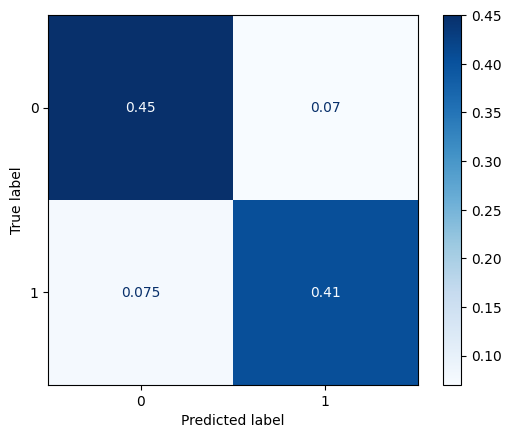

In [ ]:
#Trivial Baseline
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


model = GaussianNB()

model.fit(X_train, y_train) # fit our Naive bayes - 'train' the model


y_pred = model.predict(X_valid) # Use our fitted model to make a prediction

# Calculate accuracy - note this can often be a naive classification accuracy criterion!
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification metrics
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("Precision:", precision_score(y_valid, y_pred))
print("Recall:", recall_score(y_valid, y_pred))
print("F1-score:", f1_score(y_valid, y_pred))

# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_valid, y_pred, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['0', '1']).plot(cmap=plt.cm.Blues)
plt.grid(False)
print(sklearn.metrics.classification_report(y_valid, y_pred))

C: 1e-10, f1 score: 0.020618556701030924.
C: 1e-09, f1 score: 0.0.
C: 1e-08, f1 score: 0.0.
C: 1e-07, f1 score: 0.0.
C: 1e-06, f1 score: 0.0.
C: 1e-05, f1 score: 0.0.
C: 0.0001, f1 score: 0.0.
C: 0.001, f1 score: 0.020618556701030924.
C: 0.01, f1 score: 0.8539325842696629.
C: 0.1, f1 score: 0.8541666666666666.
C: 1.0, f1 score: 0.8512820512820513.
C: 10.0, f1 score: 0.8571428571428572.
C: 100.0, f1 score: 0.8571428571428572.
C: 1000.0, f1 score: 0.8571428571428572.
C: 10000.0, f1 score: 0.8571428571428572.
C: 100000.0, f1 score: 0.8571428571428572.
C: 1000000.0, f1 score: 0.8571428571428572.
C: 10000000.0, f1 score: 0.8571428571428572.
C: 100000000.0, f1 score: 0.8571428571428572.
C: 1000000000.0, f1 score: 0.8571428571428572.


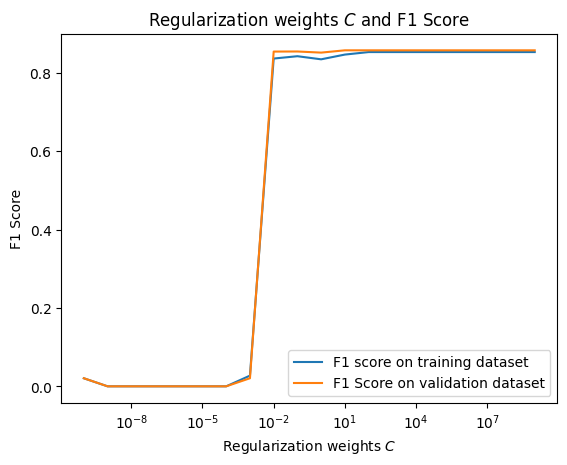


The best C: 10.0


In [ ]:
#Logistic Regression
C_indices = np.arange(20)
Cs = 10.0 ** ( C_indices-10)

f1_train_array = np.full([len(Cs)], np.nan)
f1_valid_array = np.full([len(Cs)], np.nan)

# Loop to test C values
for C_index, C in zip(C_indices, Cs):
  # train
  model = LogisticRegression(C=C)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  f1_train = f1_score(y_train, y_pred_train)

  # Validation
  y_pred_valid = model.predict(X_valid)
  f1_valid = f1_score(y_valid, y_pred_valid)

  # Store f1s for this iteration
  f1_train_array[C_index] = f1_train
  f1_valid_array[C_index] = f1_valid
  print(f'C: {C}, f1 score: {f1_valid}.')

# Plot our graph of F1 for training and validation
plt.plot(Cs, f1_train_array, label='F1 score on training dataset')
plt.plot(Cs, f1_valid_array, label='F1 Score on validation dataset')
plt.xlabel(r'Regularization weights $C$')
plt.ylabel('F1 Score')
plt.title(r'Regularization weights $C$ and F1 Score')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing C (highest f1)
best_c_index = np.nanargmax(f1_valid_array)
best_C = Cs[best_c_index]
print(f'\nThe best C:', best_C)


Accuracy: 0.8600
Precision: 0.8400
Recall: 0.8750
F1 Score: 0.8571

Confusion matrix: 
 [[0.44 0.08]
 [0.06 0.42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       104
           1       0.84      0.88      0.86        96

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



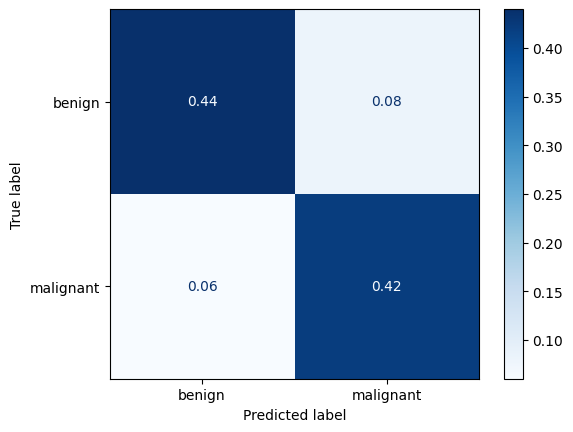

In [ ]:

model = LogisticRegression(C=best_C) # fits our Logistic Reg model with the best weight
model.fit(X_train, y_train)
y_pred_valid = model.predict(X_valid)


# Accuracy metrics - 1 is an perfect prediction
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_valid, y_pred_valid)))
print('Precision: {:.4f}'.format(precision_score(y_valid, y_pred_valid)))
print('Recall: {:.4f}'.format(recall_score(y_valid, y_pred_valid)))
print('F1 Score: {:.4f}'.format(f1_score(y_valid, y_pred_valid)))

# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_valid, y_pred_valid, normalize='all')
print(f'\nConfusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['benign', 'malignant']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(f'\nClassification Report:')
print(sklearn.metrics.classification_report(y_valid, y_pred_valid))

Accuracy: 0.945
Precision: 0.9207920792079208
Recall: 0.96875
F1-score: 0.9441624365482234
Confusion matrix: 
 [[0.48  0.04 ]
 [0.015 0.465]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       104
           1       0.92      0.97      0.94        96

    accuracy                           0.94       200
   macro avg       0.95      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



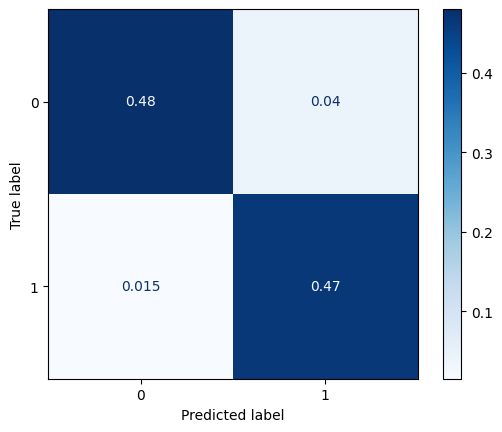

In [ ]:
# Model: Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_grid = GridSearchCV(rf_classifier, rf_params, scoring='accuracy', cv=3)
rf_grid.fit(X_train, y_train)

# Evaluate on validation set
y_val_predictions = rf_grid.best_estimator_.predict(X_valid)

# Print classification metrics
print("Accuracy:", accuracy_score(y_valid, y_val_predictions))
print("Precision:", precision_score(y_valid, y_val_predictions))
print("Recall:", recall_score(y_valid, y_val_predictions))
print("F1-score:", f1_score(y_valid, y_val_predictions))

# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_valid, y_val_predictions, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['0', '1']).plot(cmap=plt.cm.Blues)
plt.grid(False)
print(sklearn.metrics.classification_report(y_valid, y_val_predictions))


In [ ]:
print(rf_grid.best_estimator_)

RandomForestClassifier(max_depth=10, n_estimators=200)


Accuracy: 0.94
Precision: 0.9111111111111111
Recall: 0.9534883720930233
F1-score: 0.9318181818181819
Confusion matrix: 
 [[0.53 0.04]
 [0.02 0.41]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       114
           1       0.91      0.95      0.93        86

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



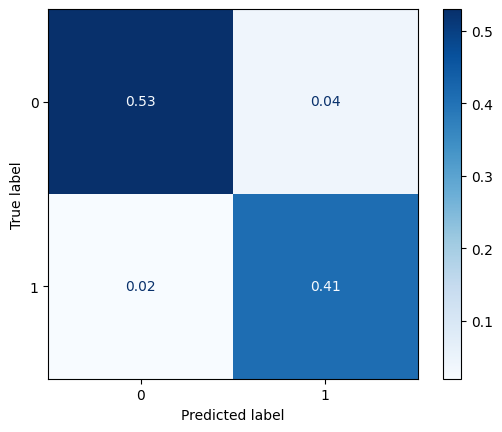

In [ ]:
#The Random Forest Classifier performs better than the Linear Regressor
rf_classifier = RandomForestClassifier(max_depth=20, n_estimators=50)
rf_classifier.fit(X_train,y_train)
y_test_predictions = rf_grid.best_estimator_.predict(X_test)

# Print classification metrics
print("Accuracy:", accuracy_score(y_test, y_test_predictions))
print("Precision:", precision_score(y_test, y_test_predictions))
print("Recall:", recall_score(y_test, y_test_predictions))
print("F1-score:", f1_score(y_test, y_test_predictions))

# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_test_predictions, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['0', '1']).plot(cmap=plt.cm.Blues)
plt.grid(False)
print(sklearn.metrics.classification_report(y_test, y_test_predictions))

# Convolutional Neural Networks (CNN)

In [ ]:
!gdown --id 1QJQk0g2K6QsnhgQWUageMadCxpIfYtk7

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QJQk0g2K6QsnhgQWUageMadCxpIfYtk7
To: /content/COMP1801_CourseworkDataset2_images.zip
100% 9.00M/9.00M [00:00<00:00, 28.3MB/s]


In [ ]:
!unzip COMP1801_CourseworkDataset2_images.zip

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,regularizers
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
# Load metadata from the CSV file - this allows us to know what class each picture belongs to.
df_images = pd.read_csv("COMP1801_CourseworkDataset2_images/COMP1801_CourseworkDataset2_images_metadata.csv")

# Define the directory where your images are located (in colab in our case)
image_directory = "COMP1801_CourseworkDataset2_images"

# Define image size - this means we can rescale all our images to be the same size
image_size = (128, 128)

# Create lists to store image data and labels
images = []
labels = []

# Load and preprocess images
for index, row in df_images.iterrows():
    image_path = os.path.join(image_directory, row['Image Filename'])
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
    images.append(image_array)
    labels.append(row['Type'])

In [ ]:
print(images[:2])
print("-----------")
print(labels[:2])

[array([[[0.49803922, 0.49803922, 0.49803922],
        [0.46666667, 0.46666667, 0.46666667],
        [0.45490196, 0.45490196, 0.45490196],
        ...,
        [0.52156866, 0.52156866, 0.52156866],
        [0.49411765, 0.49411765, 0.49411765],
        [0.47843137, 0.47843137, 0.47843137]],

       [[0.49019608, 0.49019608, 0.49019608],
        [0.45882353, 0.45882353, 0.45882353],
        [0.45882353, 0.45882353, 0.45882353],
        ...,
        [0.5294118 , 0.5294118 , 0.5294118 ],
        [0.49803922, 0.49803922, 0.49803922],
        [0.4627451 , 0.4627451 , 0.4627451 ]],

       [[0.48235294, 0.48235294, 0.48235294],
        [0.4392157 , 0.4392157 , 0.4392157 ],
        [0.4392157 , 0.4392157 , 0.4392157 ],
        ...,
        [0.5176471 , 0.5176471 , 0.5176471 ],
        [0.4862745 , 0.4862745 , 0.4862745 ],
        [0.45882353, 0.45882353, 0.45882353]],

       ...,

       [[0.5529412 , 0.5529412 , 0.5529412 ],
        [0.5921569 , 0.5921569 , 0.5921569 ],
        [0.59607846, 

In [ ]:
df_images.describe()

,Image Filename,Defect,Type
count,1000,1000,1000
unique,1000,2,4
top,scan_0.png,No,None
freq,1,624,624


In [ ]:
print(df_images['Type'].value_counts())

None        624
Multiple    254
Splinter     68
Large        54
Name: Type, dtype: int64


<Axes: >

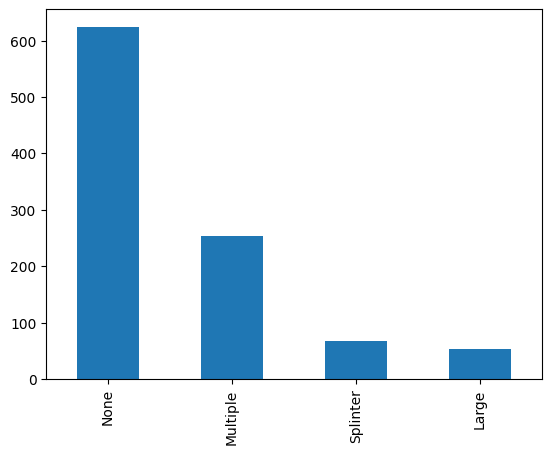

In [ ]:
df_images['Type'].value_counts().plot(kind='bar')

In [ ]:
X = images  # Features (remove the target column)
y = labels  # Labels (only the target column)

# Display the shapes of X and y
print("Shape of X:", X.index)
print("Shape of y:", y.index)

Shape of X: <built-in method index of list object at 0x78ed4c267640>
Shape of y: <built-in method index of list object at 0x78ed45f325c0>


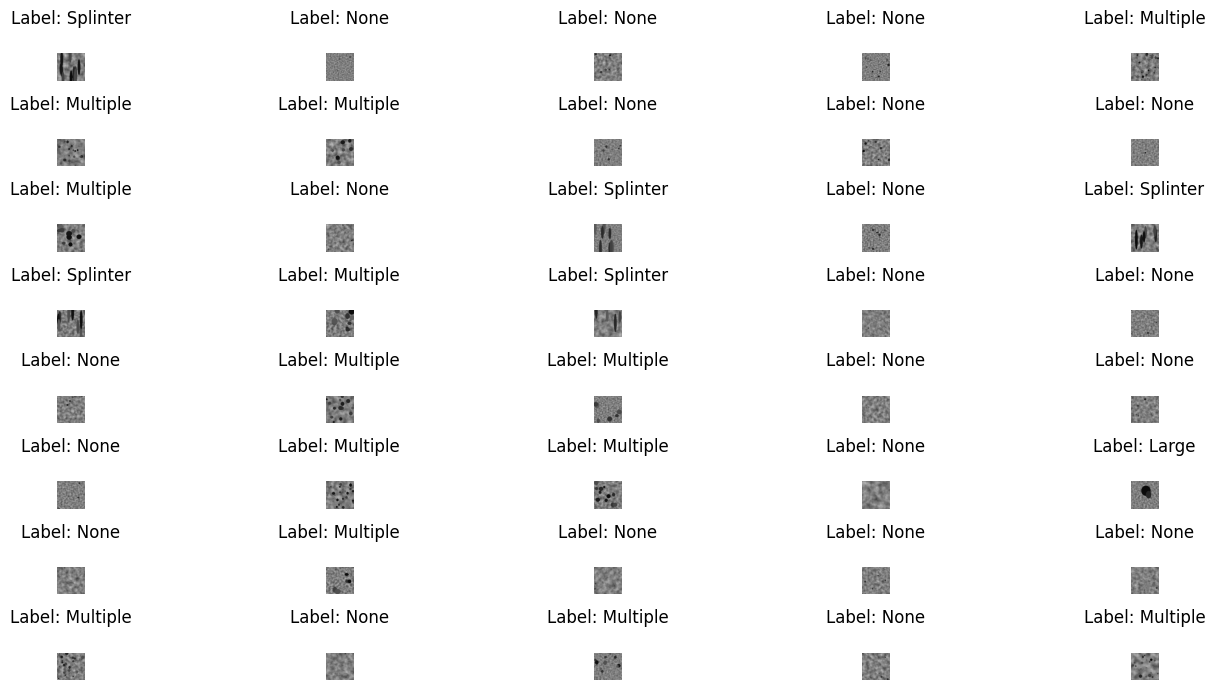

In [ ]:
# Define the number of rows and columns for image visualization
num_images_to_visualize = 40

num_rows = 8
num_columns = num_images_to_visualize // num_rows

# Get a random subset of images from the validation set
subset_indices = np.random.choice(40, num_images_to_visualize, replace=False)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 7))

# Loop through the subset of images
for i, index in enumerate(subset_indices):
    row = i // num_columns
    col = i % num_columns

    imd=(images[index]*255).astype(np.uint8)

    # Plot the image
    axes[row, col].imshow(imd)
    axes[row, col].axis('off')

    # Set the title with both true and predicted labels
    title = f"Label: {labels[index]}\n"
    axes[row, col].set_title(title)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Convert class labels to integers
class_mapping = {'None': 0, 'Splinter': 1, 'Large': 2, 'Multiple': 3}
labels = [class_mapping[label] for label in labels]

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [ ]:
print(images.shape)
print(labels.shape)

(1000, 128, 128, 3)
(1000,)


In [ ]:
X_non_test, X_test, y_non_test, y_test = train_test_split(images, labels, test_size=1/10, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_non_test, y_non_test, test_size=1/9, random_state=42)

In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(4, activation = 'softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 64)                8128576   
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 8129732 (31.01 MB)
Trainable params: 8129732 (31.01 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model1.fit(X_train, y_train,batch_size = 100, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 13s 1s/step - loss: 1.0568 - accuracy: 0.5612 - val_loss: 1.0244 - val_accuracy: 0.5900
Epoch 2/30
8/8 [==============================] - 9s 1s/step - loss: 0.9460 - accuracy: 0.6275 - val_loss: 0.9501 - val_accuracy: 0.5900
Epoch 3/30
8/8 [==============================] - 11s 1s/step - loss: 0.8766 - accuracy: 0.6275 - val_loss: 0.8968 - val_accuracy: 0.5900
Epoch 4/30
8/8 [==============================] - 11s 1s/step - loss: 0.8082 - accuracy: 0.6438 - val_loss: 0.8547 - val_accuracy: 0.6300
Epoch 5/30
8/8 [==============================] - 10s 1s/step - loss: 0.7598 - accuracy: 0.6825 - val_loss: 0.8229 - val_accuracy: 0.7700
Epoch 6/30
8/8 [==============================] - 10s 1s/step - loss: 0.7226 - accuracy: 0.7113 - val_loss: 0.7747 - val_accuracy: 0.7600
Epoch 7/30
8/8 [==============================] - 11s 1s/step - loss: 0.6635 - accuracy: 0.7663 - val_loss: 0.7452 - val_accuracy: 0.7600
Epoch 8/30
8/8 [==============================

In [ ]:
y_pred = model1.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)
print("Accuracy:", accuracy_score(y_valid, y_pred_classes))
print(classification_report(y_valid, y_pred_classes))
conf_mat = confusion_matrix(y_valid, y_pred_classes)
print(conf_mat)

4/4 [==============================] - 0s 73ms/step
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        59
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.80      0.83      0.81        29

    accuracy                           0.83       100
   macro avg       0.41      0.46      0.43       100
weighted avg       0.73      0.83      0.78       100

[[59  0  0  0]
 [ 3  0  0  3]
 [ 3  0  0  3]
 [ 5  0  0 24]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


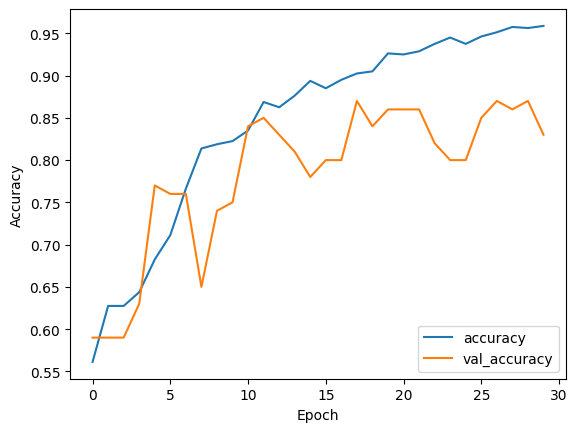

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(4, activation = 'softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
model2.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model2.fit(X_train, y_train,batch_size = 100, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8/8 [==============================] - 23s 3s/step - loss: 1.1146 - accuracy: 0.5150 - val_loss: 0.9720 - val_accuracy: 0.6200
Epoch 2/20
8/8 [==============================] - 19s 2s/step - loss: 0.8714 - accuracy: 0.6862 - val_loss: 0.7563 - val_accuracy: 0.7500
Epoch 3/20
8/8 [==============================] - 19s 2s/step - loss: 0.6574 - accuracy: 0.7800 - val_loss: 0.6857 - val_accuracy: 0.7400
Epoch 4/20
8/8 [==============================] - 21s 3s/step - loss: 0.4976 - accuracy: 0.8350 - val_loss: 0.5842 - val_accuracy: 0.8100
Epoch 5/20
8/8 [==============================] - 19s 2s/step - loss: 0.3972 - accuracy: 0.8925 - val_loss: 0.5130 - val_accuracy: 0.8500
Epoch 6/20
8/8 [==============================] - 19s 2s/step - loss: 0.3344 - accuracy: 0.9087 - val_loss: 0.4983 - val_accuracy: 0.8300
Epoch 7/20
8/8 [==============================] - 20s 2s/step - loss: 0.2692 - accuracy: 0.9187 - val_loss: 0.5066 - val_accuracy: 0.8300
Epoch 8/20
8/8 [=============================

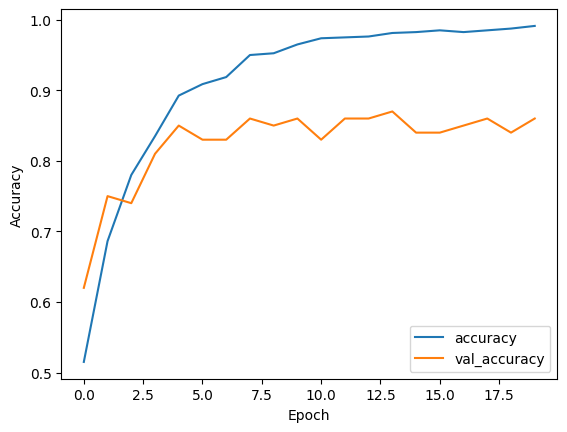

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)       

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(X_train, y_train,batch_size = 100, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
8/8 [==============================] - 25s 3s/step - loss: 1.1178 - accuracy: 0.4712 - val_loss: 1.0168 - val_accuracy: 0.5900
Epoch 2/20
8/8 [==============================] - 22s 3s/step - loss: 0.9474 - accuracy: 0.6313 - val_loss: 0.9184 - val_accuracy: 0.5900
Epoch 3/20
8/8 [==============================] - 24s 3s/step - loss: 0.7886 - accuracy: 0.7088 - val_loss: 0.6694 - val_accuracy: 0.8400
Epoch 4/20
8/8 [==============================] - 22s 3s/step - loss: 0.5881 - accuracy: 0.8275 - val_loss: 0.5260 - val_accuracy: 0.8500
Epoch 5/20
8/8 [==============================] - 22s 3s/step - loss: 0.4631 - accuracy: 0.8537 - val_loss: 0.5464 - val_accuracy: 0.8100
Epoch 6/20
8/8 [==============================] - 25s 3s/step - loss: 0.4175 - accuracy: 0.8737 - val_loss: 0.5370 - val_accuracy: 0.8200
Epoch 7/20
8/8 [==============================] - 23s 3s/step - loss: 0.4128 - accuracy: 0.8650 - val_loss: 0.4932 - val_accuracy: 0.8500
Epoch 8/20
8/8 [==================

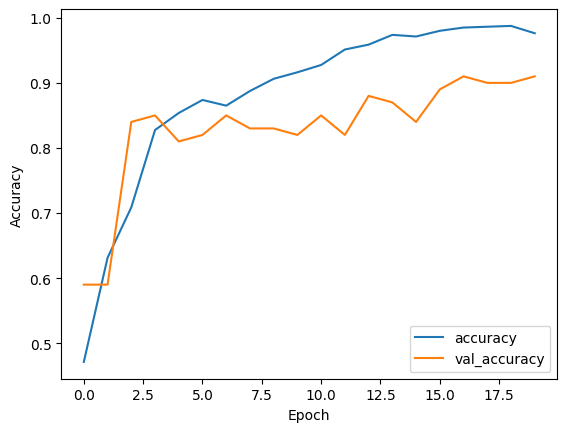

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

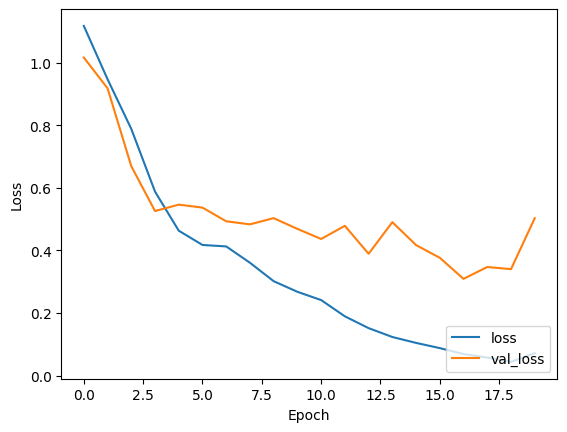

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(128, 128, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(4, activation = 'softmax'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)       

In [ ]:
model3.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model3.fit(X_train, y_train,batch_size = 100, epochs=25,
                    validation_data=(X_valid, y_valid))

Epoch 1/25
8/8 [==============================] - 23s 3s/step - loss: 1.1226 - accuracy: 0.5788 - val_loss: 1.0651 - val_accuracy: 0.5900
Epoch 2/25
8/8 [==============================] - 24s 3s/step - loss: 0.9945 - accuracy: 0.6263 - val_loss: 0.9239 - val_accuracy: 0.6000
Epoch 3/25
8/8 [==============================] - 23s 3s/step - loss: 0.9018 - accuracy: 0.6775 - val_loss: 0.8826 - val_accuracy: 0.6100
Epoch 4/25
8/8 [==============================] - 22s 3s/step - loss: 0.6777 - accuracy: 0.8062 - val_loss: 0.6559 - val_accuracy: 0.8000
Epoch 5/25
8/8 [==============================] - 23s 3s/step - loss: 0.5743 - accuracy: 0.8375 - val_loss: 0.6334 - val_accuracy: 0.8400
Epoch 6/25
8/8 [==============================] - 22s 3s/step - loss: 0.5052 - accuracy: 0.8550 - val_loss: 0.5639 - val_accuracy: 0.8500
Epoch 7/25
8/8 [==============================] - 23s 3s/step - loss: 0.4773 - accuracy: 0.8700 - val_loss: 0.5557 - val_accuracy: 0.8100
Epoch 8/25
8/8 [==================

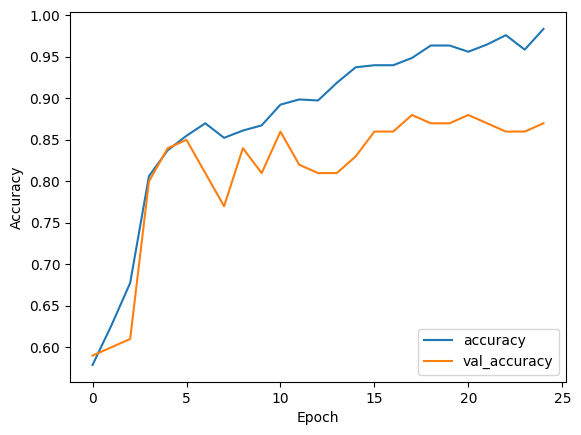

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

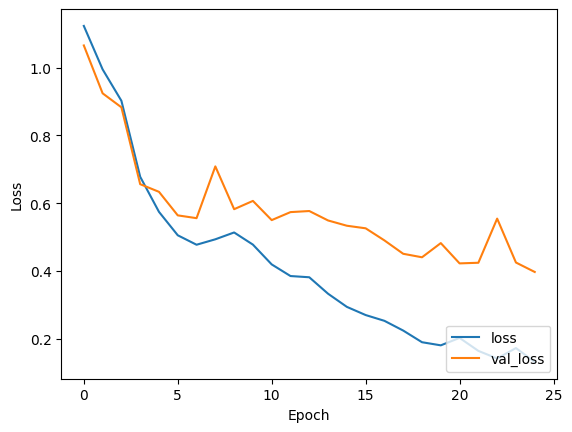

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))
conf_mat = confusion_matrix(y_test, y_pred_classes)
print(conf_mat)

4/4 [==============================] - 1s 153ms/step
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        63
           1       0.83      0.62      0.71         8
           2       0.00      0.00      0.00         7
           3       0.79      0.86      0.83        22

    accuracy                           0.86       100
   macro avg       0.64      0.62      0.62       100
weighted avg       0.82      0.86      0.84       100

[[62  0  0  1]
 [ 0  5  2  1]
 [ 4  0  0  3]
 [ 1  1  1 19]]


In [ ]:
acc_test = accuracy_score(y_test, y_pred_classes)
f1_test = f1_score(y_test, y_pred_classes, average='macro')
print('The accuracy on the test data:', acc_test)
print('The F1 score on the test data:', f1_test)

The accuracy on the test data: 0.86
The F1 score on the test data: 0.6235547061634018


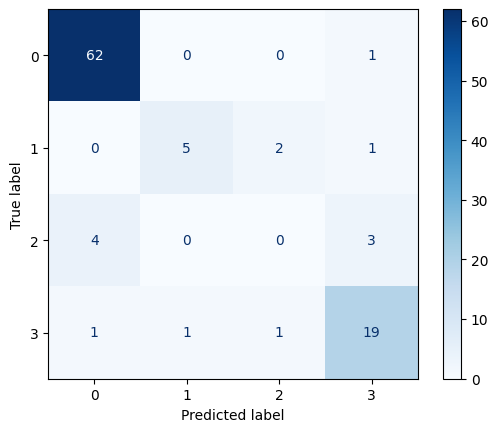

In [ ]:
sklearn.metrics.ConfusionMatrixDisplay(conf_mat).plot(cmap=plt.cm.Blues)

# Clustering

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

In [ ]:
numerical_columns_cluster = ['Lifespan','coolingRate','quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']
X_cluster = df[numerical_columns_cluster]

In [ ]:
X_cluster

,Lifespan,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
0,284.161690,25,4.460592,7.937116,22,0,7
1,1599.551748,9,1.425973,2.432948,2,0,0
2,768.311031,26,2.508879,3.841211,25,0,0
3,1697.663828,12,3.248913,2.610700,10,0,0
4,1491.478862,20,1.901670,4.634926,24,0,0
...,...,...,...,...,...,...,...
995,462.984817,24,2.023624,2.741713,20,0,0
996,1426.298870,21,1.741670,7.206022,12,0,0
997,1538.072772,14,1.658847,8.276388,12,0,0
998,1893.052813,9,2.124314,5.033330,0,0,0


In [ ]:
X_cluster.describe()

,Lifespan,coolingRate,quenchTime,forgeTime,smallDefects,largeDefects,sliverDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,1366.373468,17.480000,2.786059,5.497136,13.37100,0.117000,0.286000
std,519.026551,7.557958,1.320935,2.613501,8.07047,0.565359,1.351307
min,115.120563,5.000000,0.501046,1.017799,0.00000,0.000000,0.000000
25%,960.976320,11.000000,1.608916,3.203739,8.00000,0.000000,0.000000
50%,1470.377014,17.000000,2.824488,5.510765,16.00000,0.000000,0.000000
75%,1757.165684,24.000000,3.902389,7.735951,20.00000,0.000000,0.000000
max,2380.142759,30.000000,4.990795,9.988511,33.00000,4.000000,10.000000


In [ ]:
X_cluster = np.array(X_cluster)

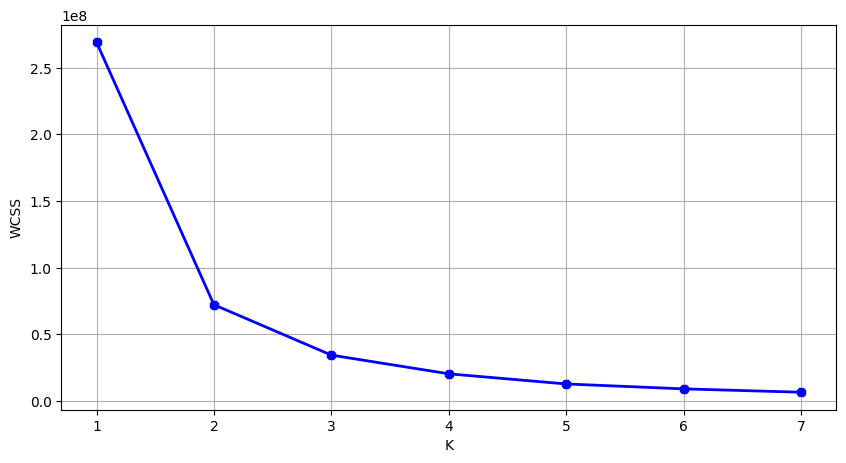

In [ ]:
wcss = [] # storing the within-cluster sum of square (WCSS) distances
for k in range(1,8): # different values of K = 1, 2, 3, 4, 5
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_) # member variable inertia_ contains the WCSS for that particular K
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,8),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K")
plt.xticks([x for x in range(1, 8)])
plt.ylabel("WCSS")
plt.show()

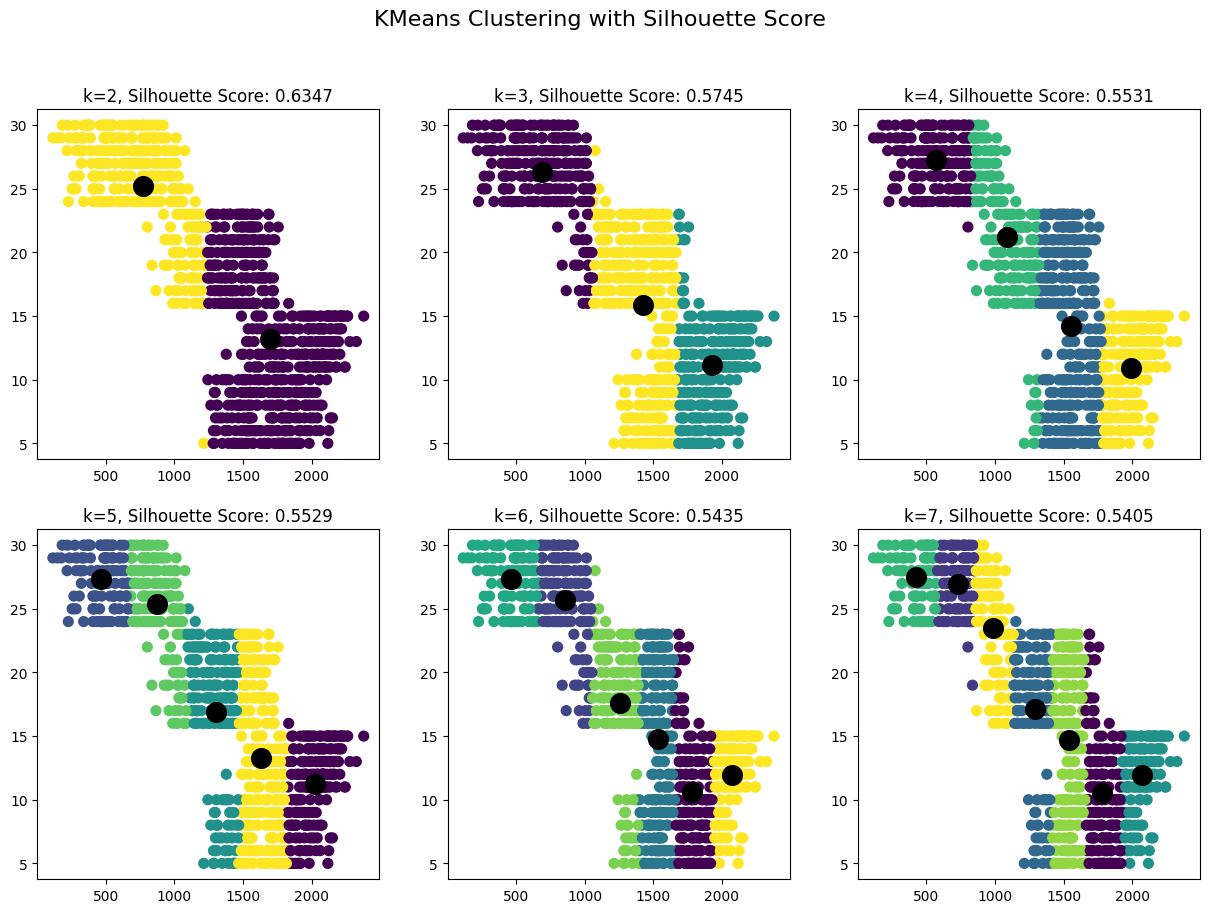

In [ ]:
# Set up the subplot layout
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('KMeans Clustering with Silhouette Score', fontsize=16)
axs = axs.flatten() # Flatten the axs array for easy indexing

for k in range(2, 8):
    # KMeans clustering
    model = KMeans(n_clusters=k, n_init='auto')
    cluster_labels = model.fit_predict(X_cluster)

    # Silhouette Score
    score = silhouette_score(X_cluster, cluster_labels)

    # Scatter Plot
    axs[k-2].scatter(X_cluster[:, 0], X_cluster[:, 1], c=cluster_labels, s=50, cmap='viridis')
    axs[k-2].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', s=200)
    axs[k-2].set_title(f'k={k}, Silhouette Score: {score:.4f}')

plt.show()

In [ ]:
y_true = df1['defective']

In [ ]:
model = KMeans(n_clusters=2, n_init='auto')
cluster_labels = model.fit_predict(X_cluster)

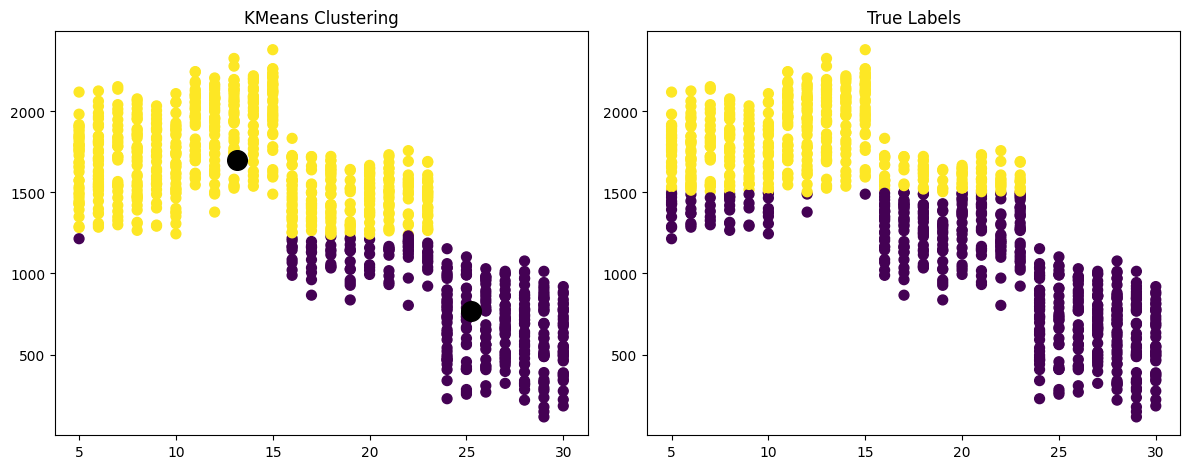

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First Scatter Plot
axs[0].scatter(X_cluster[:, 1], X_cluster[:, 0], c=cluster_labels, s=50, cmap='viridis')
axs[0].scatter(model.cluster_centers_[:, 1], model.cluster_centers_[:, 0], c='black', s=200)
axs[0].set_title('KMeans Clustering')

# Second Scatter Plot
axs[1].scatter(X_cluster[:, 1], X_cluster[:, 0], c=y_true, s=50, cmap='viridis')
axs[1].set_title('True Labels')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

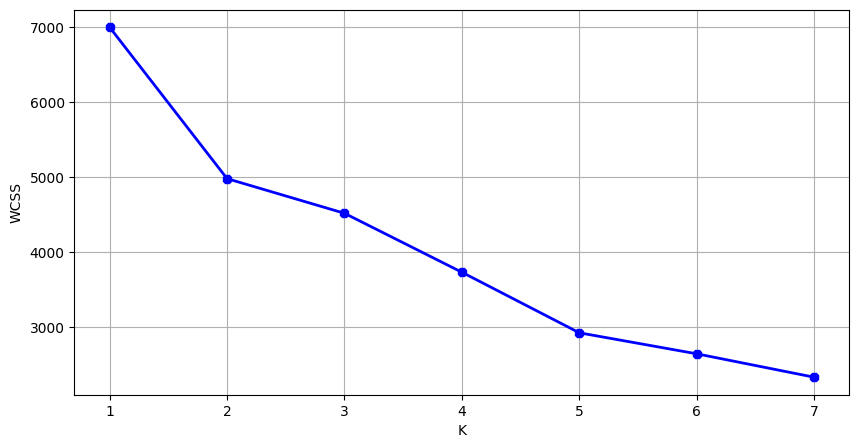

In [ ]:
wcss = [] # storing the within-cluster sum of square (WCSS) distances
for k in range(1,8): # different values of K = 1, 2, 3, 4, 5
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # member variable inertia_ contains the WCSS for that particular K
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,8),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K")
plt.xticks([x for x in range(1, 8)])
plt.ylabel("WCSS")
plt.show()

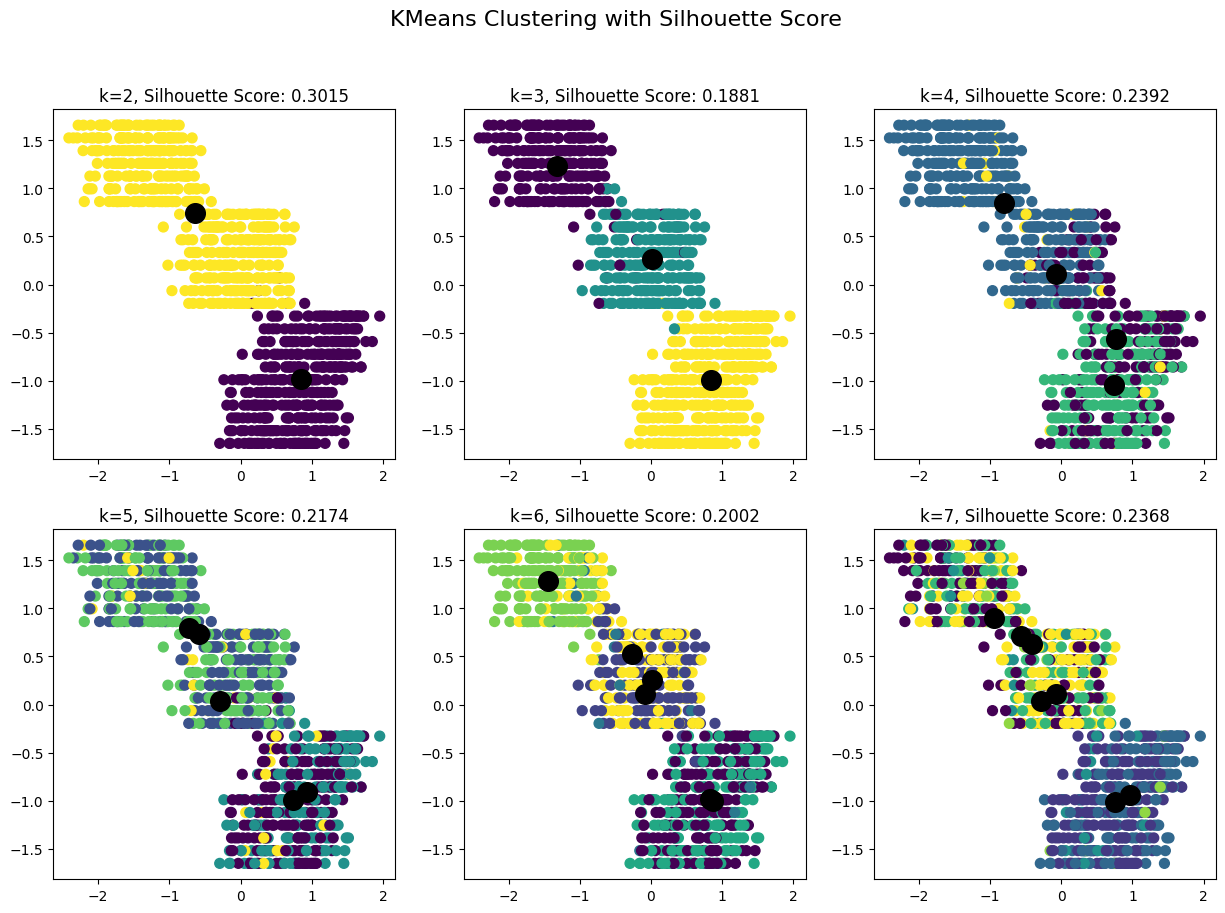

In [ ]:
# Set up the subplot layout
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('KMeans Clustering with Silhouette Score', fontsize=16)
axs = axs.flatten() # Flatten the axs array for easy indexing

for k in range(2, 8):
    # KMeans clustering
    model = KMeans(n_clusters=k, n_init='auto')
    cluster_labels = model.fit_predict(X_scaled)

    # Silhouette Score
    score = silhouette_score(X_scaled, cluster_labels)

    # Scatter Plot
    axs[k-2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, s=50, cmap='viridis')
    axs[k-2].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', s=200)
    axs[k-2].set_title(f'k={k}, Silhouette Score: {score:.4f}')

plt.show()

In [ ]:
model = KMeans(n_clusters=2, n_init='auto')
cluster_labels = model.fit_predict(X_scaled)

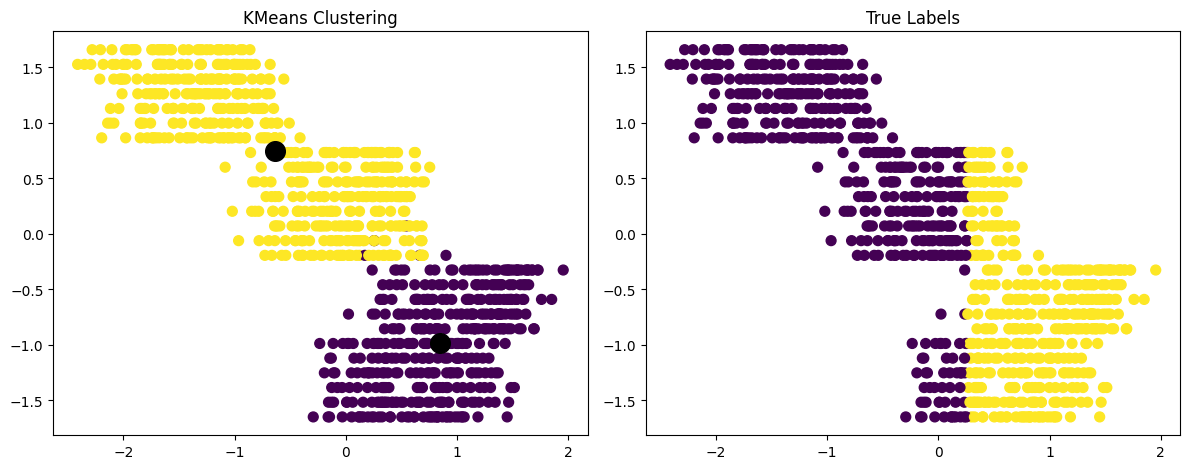

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First Scatter Plot
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, s=50, cmap='viridis')
axs[0].scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', s=200)
axs[0].set_title('KMeans Clustering')

# Second Scatter Plot
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, s=50, cmap='viridis')
axs[1].set_title('True Labels')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()